<span style="font-size:24px;"><strong>Nama: Raihan Satriya Bagaskara</strong></span>

<span style="font-size:24px;"><strong>NIM: A11.2020.12757</strong></span>

<span style="font-size:24px;"><strong>Kelas: STKI-A11.4708</strong></span>

-----

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
data = pd.read_csv('Tweets.csv',delimiter=',')

In [35]:
print(data.columns)

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')


In [13]:
print(data)

                 tweet_id airline_sentiment  airline_sentiment_confidence  \
0      570306133677760513           neutral                        1.0000   
1      570301130888122368          positive                        0.3486   
2      570301083672813571           neutral                        0.6837   
3      570301031407624196          negative                        1.0000   
4      570300817074462722          negative                        1.0000   
...                   ...               ...                           ...   
14635  569587686496825344          positive                        0.3487   
14636  569587371693355008          negative                        1.0000   
14637  569587242672398336           neutral                        1.0000   
14638  569587188687634433          negative                        1.0000   
14639  569587140490866689           neutral                        0.6771   

               negativereason  negativereason_confidence         airline  \

In [59]:
data_feature = data['negativereason'].astype(str)

In [37]:
data_feature

0                           nan
1                           nan
2                           nan
3                    Bad Flight
4                    Can't Tell
                  ...          
14635                       nan
14636    Customer Service Issue
14637                       nan
14638    Customer Service Issue
14639                       nan
Name: negativereason, Length: 14640, dtype: object

In [38]:
data.shape

(14640, 15)

In [39]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [41]:
dataset_label = data['airline_sentiment_confidence']
dataset_label

0        1.0000
1        0.3486
2        0.6837
3        1.0000
4        1.0000
          ...  
14635    0.3487
14636    1.0000
14637    1.0000
14638    1.0000
14639    0.6771
Name: airline_sentiment_confidence, Length: 14640, dtype: float64

C:\Users\Winry\AppData\Local\Temp\ipykernel_13956\2639930849.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}', color='skyblue')


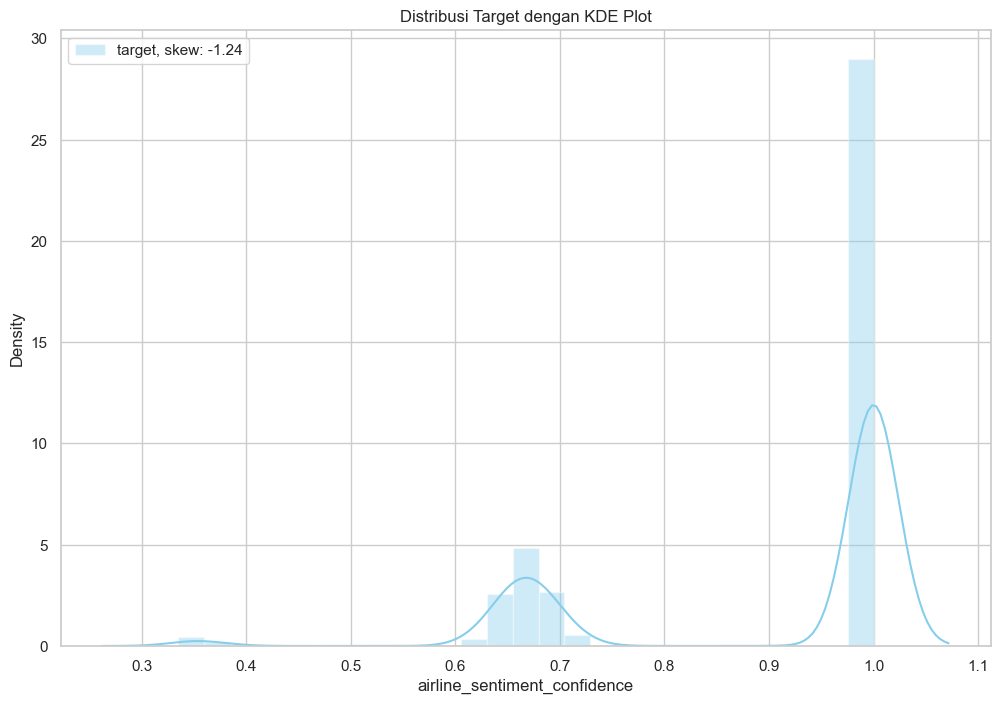

In [42]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,8))
sns.distplot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}', color='skyblue')
plt.title('Distribusi Target dengan KDE Plot')
plt.legend(loc='best')
plt.show()

In [43]:
dataset_label.value_counts()

1.0000    10445
0.6667       71
0.6632       35
0.6596       30
0.6559       30
          ...  
0.3674        1
0.6155        1
0.3708        1
0.6905        1
0.3487        1
Name: airline_sentiment_confidence, Length: 1023, dtype: int64

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [63]:
tf_idf = TfidfVectorizer()
tf_idf.fit(data_feature)  
X = tf_idf.transform(data_feature)
feature_names = tf_idf.get_feature_names_out()

In [51]:
print('Shape tf_idf:', X.shape)

Shape tf_idf: (14640, 18)


In [64]:
print(f"Jumlah fitur: {len(feature_names)}")
print(feature_names[:20])

Jumlah fitur: 18
['attendant' 'bad' 'booking' 'can' 'cancelled' 'complaints' 'customer'
 'damaged' 'flight' 'issue' 'late' 'longlines' 'lost' 'luggage' 'nan'
 'problems' 'service' 'tell']


In [48]:
# Melihat matriks jumlah token menggunakan TF IDF

data_tf_idf = tf_idf.get_feature_names_out()
data_tf_idf

array(['attendant', 'bad', 'booking', 'can', 'cancelled', 'complaints',
       'customer', 'damaged', 'flight', 'issue', 'late', 'longlines',
       'lost', 'luggage', 'nan', 'problems', 'service', 'tell'],
      dtype=object)

In [65]:
idfValues = tf_idf.idf_

In [66]:
d = dict(zip(data_tf_idf, 9 - idfValues))

In [67]:
sortedDict = sorted(d.items(), key = lambda d: d[1], reverse = True)

In [69]:
for i in range(len(sortedDict)):
    print(sortedDict[i])

('nan', 7.014172277202236)
('flight', 6.727892601248704)
('customer', 6.384670852552141)
('issue', 6.384670852552141)
('service', 6.384670852552141)
('late', 5.826599731533306)
('can', 5.490967478161818)
('tell', 5.490967478161818)
('cancelled', 5.151299544598421)
('luggage', 5.091779854572792)
('lost', 4.994590563661193)
('bad', 4.773169665658429)
('booking', 4.681295915352685)
('problems', 4.681295915352685)
('attendant', 4.5863630228571175)
('complaints', 4.5863630228571175)
('longlines', 3.595804714647273)
('damaged', 2.7259070223428283)


In [71]:
!pip install wordcloud

     -------------------------------------- 152.1/152.1 kB 1.8 MB/s eta 0:00:00


In [72]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image

In [83]:
import urllib.request

url = "https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg"
filename = "cloud.jpg"
urllib.request.urlretrieve(url, filename)

('cloud.jpg', <http.client.HTTPMessage at 0x27ebe2b9390>)

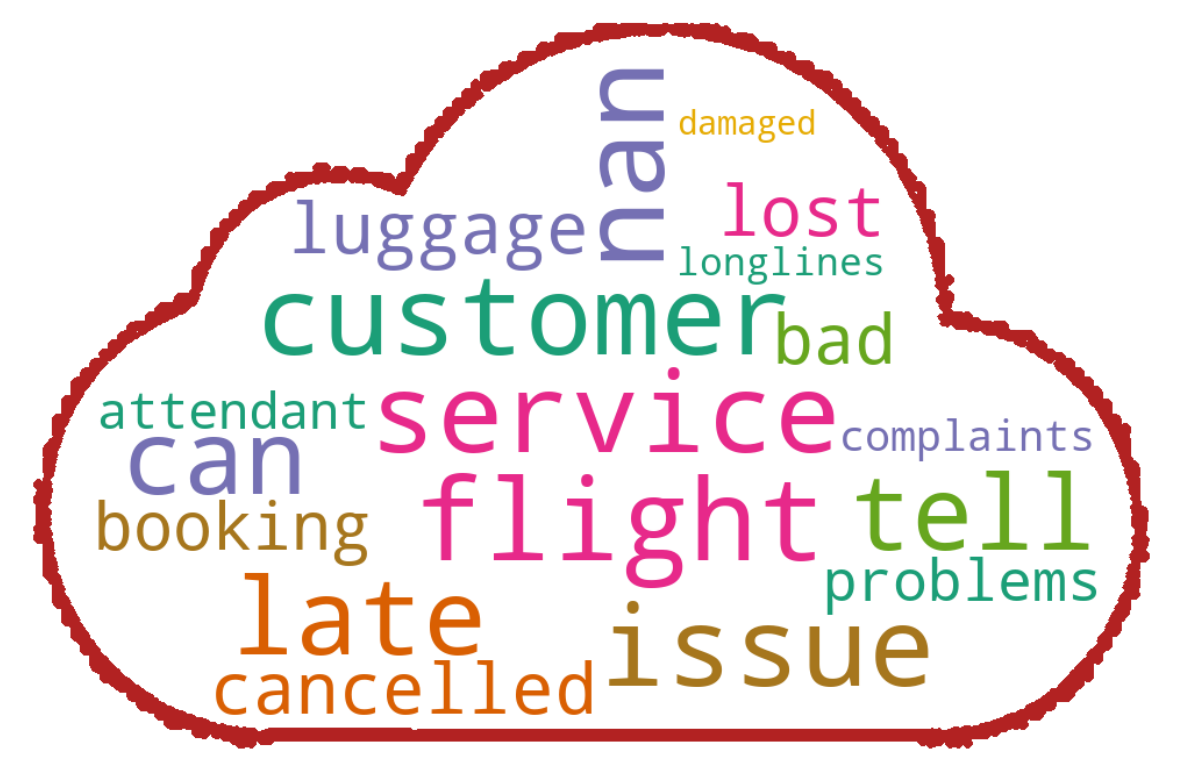

In [86]:
def PlotWordCloud(frequency, cloud_mask_path):
    cloud_mask = np.array(Image.open(cloud_mask_path))
    
    wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=100, min_font_size=10,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate_from_frequencies(frequencies=frequency)
    
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

PlotWordCloud(d, 'cloud.jpg')